In [1]:
import pandas as pd
import numpy as np

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

import matplotlib.pyplot as plt
import seaborn as sns

#Ignore convergence warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
from models.liamometer_helpers import give_linearregression, give_polynomialregression

In [3]:
mojo = pd.read_csv('data/mojo.csv')
imdb = pd.read_csv('data/imdb.csv')
X_train, X_test, y_train, y_test = give_linearregression(mojo, imdb)
X_train_, X_test_, y_train_, y_test_ = give_polynomialregression(mojo, imdb)

/Users/liamisaacs/Desktop/github repositories/metis-project2/models/liamometer_helpers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[option] = df[x].str.contains(option).astype('int')
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/liamisaacs/Desktop/github repositories/metis-project2/models/liamometer_helpers.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

# Linear Regression

----

## Alpha selection

----

LASSO

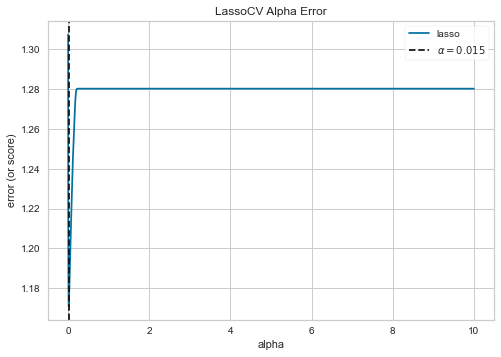

In [4]:
alphas = np.logspace(-10, 1, 400)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

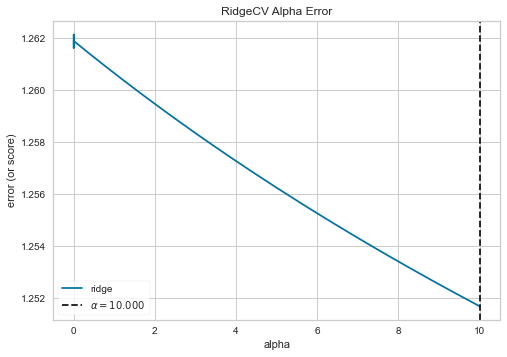

In [5]:
alphas = np.logspace(-10, 1, 400)

model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

----
## Prediction error


----

### Lasso CV

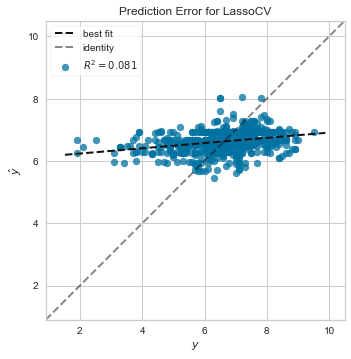

In [6]:
model = LassoCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Ridge CV

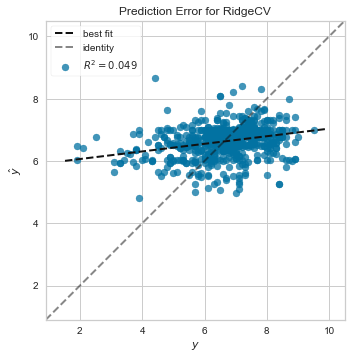

In [7]:
model = RidgeCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

----

## Residual plots

----

### LASSO 5-fold CV

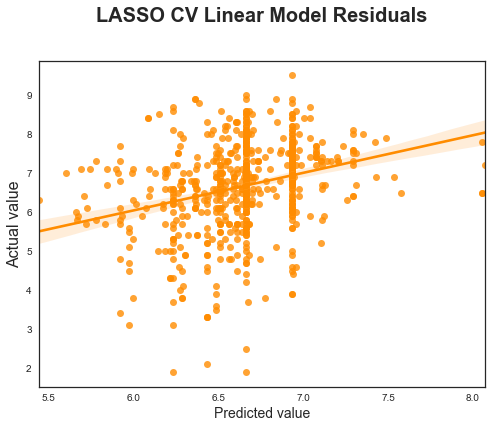

In [8]:
lasso_cv_5_fold = LassoCV(cv=5)
lasso_cv_5_fold.fit(X_train, y_train)             
train_set_pred_lasso = lasso_cv_5_fold.predict(X_train)
test_set_pred_lasso = lasso_cv_5_fold.predict(X_test)

plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=test_set_pred_lasso, y=y_test, color="darkorange")
ax.set_title("LASSO CV Linear Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-LASSO-linear', dpi=300, bbox_inches='tight')

### Ridge 5-fold CV

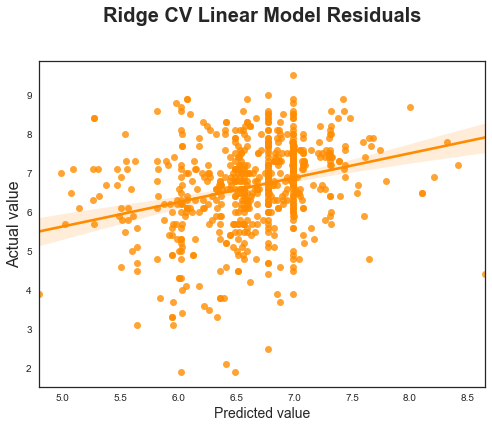

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

ridge_cv_5_fold = RidgeCV(cv=5)
ridge_cv_5_fold.fit(X_train, y_train)             
train_set_pred_lasso = ridge_cv_5_fold.predict(X_train)
test_set_pred_lasso = ridge_cv_5_fold.predict(X_test)

plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=test_set_pred_lasso, y=y_test, color="darkorange")
ax.set_title("Ridge CV Linear Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-ridge-linear', dpi=300, bbox_inches='tight')

----

## Residuals w/ Q-Q plot

----

### LASSO 5-fold CV

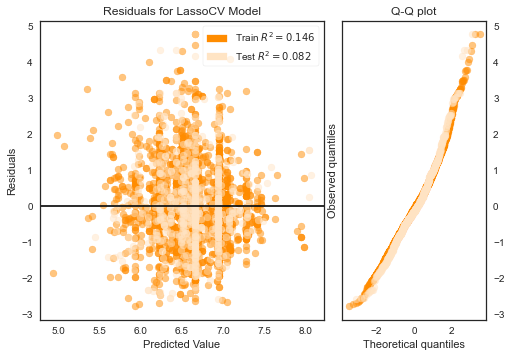

Note: Train/Test R^2 is for the residuals


In [41]:
lasso_cv_5_fold = LassoCV(cv=5)
visualizer = ResidualsPlot(lasso_cv_5_fold, hist=False, qqplot=True, 
                           train_color='darkorange', test_color='bisque',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                         # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")

### Ridge 5-fold CV

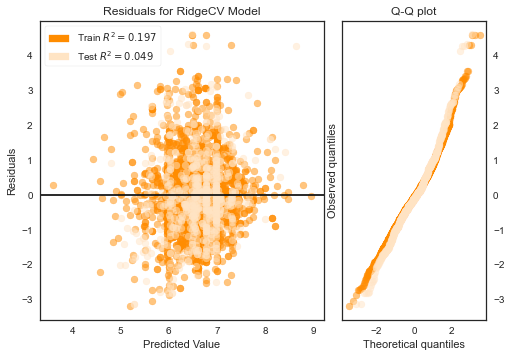

Note: Train/Test R^2 is for the residuals


In [40]:
ridge_cv_5_fold = RidgeCV(cv=5)
visualizer = ResidualsPlot(ridge_cv_5_fold, hist=False, qqplot=True,
                          train_color='darkorange', test_color='bisque',
                        train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                         # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")

----

## Residuals w/ histograms

---

### Lasso 5-fold CV

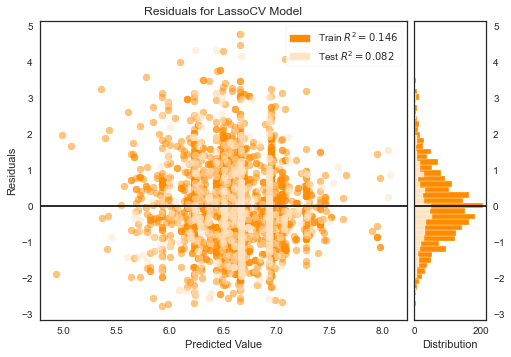

Note: Train/Test R^2 is for the residuals


In [38]:
model = LassoCV(cv=5)
visualizer = ResidualsPlot(model, train_color='darkorange', test_color='bisque',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                             # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")

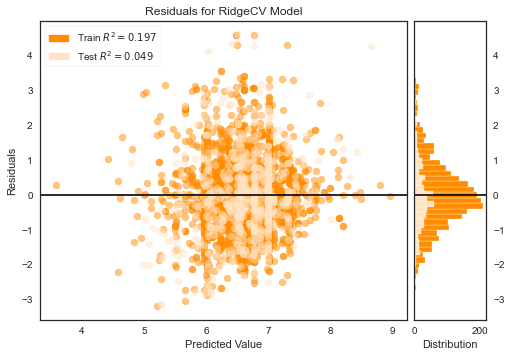

Note: Train/Test R^2 is for the residuals


In [39]:
model = RidgeCV(cv=5)
visualizer = ResidualsPlot(model, train_color='darkorange', test_color='bisque',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                             # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")

# Polynomial Regression

----

## Alpha selection not possible


----

----

## Prediction error

----

### Lasso CV

In [16]:
"""
model = LassoCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train_, y_train_)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test_)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
"""
print("Cannot predict LassoCV without CPU overload")

Cannot predict LassoCV without CPU overload


### Ridge CV

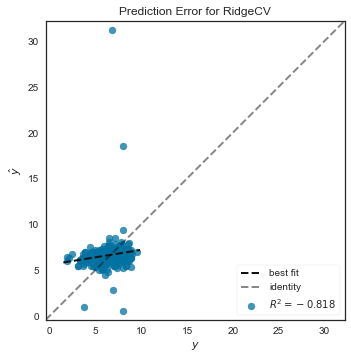

In [15]:
model = RidgeCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train_, y_train_)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test_)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

----

## Residual plots

----

### Lasso 5-fold CV (polynomial reg)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only = True)

X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)


In [23]:
print("Notice how the feature space, when we add in polynomial regression, expands")
print("From ",str(X_train.shape[1])," features to ",str(X_train_.shape[1]), "features.")
print("Just by looking at initial residual plot (StepIII notebook) residuals are not randomly distributed, and given the large feature space LASSO will be helpful, \nbut it also takes FOREVER to run.")

Notice how the feature space, when we add in polynomial regression, expands
From  378  features to  71632 features.
Just by looking at initial residual plot (StepIII notebook) residuals are not randomly distributed, and given the large feature space LASSO will be helpful, 
but it also takes FOREVER to run.


In [24]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_, y_train)
lasso_train_pred_poly = lasso.predict(X_train_)
#Train on training, predict on actual, compare with actual = residual plot
lasso_test_pred_poly = lasso.predict(X_test_)
print("Lasso model is too computationally expensive to run on polynomial regression")

Lasso model is too computationally expensive to run on polynomial regression


Just kidding -- just took around an hour or so, mainly in calculating train/test predictions.


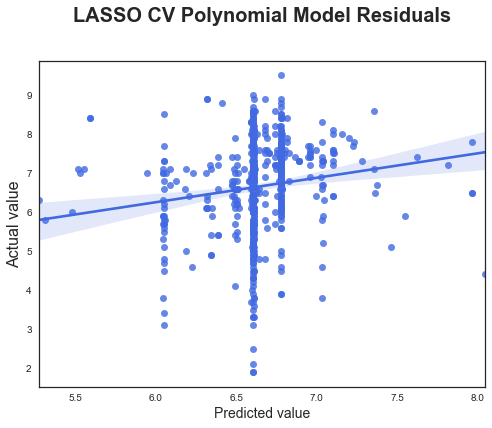

In [26]:
print("Just kidding -- just took around an hour or so, mainly in calculating train/test predictions.")
plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=lasso_test_pred_poly, y=y_test, color="royalblue")
ax.set_title("LASSO CV Polynomial Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-LASSO-poly', dpi=300, bbox_inches='tight')


### Ridge 5-fold CV (polynomial reg)

In [8]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train_, y_train)
#ridge_train_pred_poly = ridge.predict(X_train_)
#Train on training data then predict test, compare with actual = residual plot
ridge_test_pred_poly = ridge.predict(X_test_)

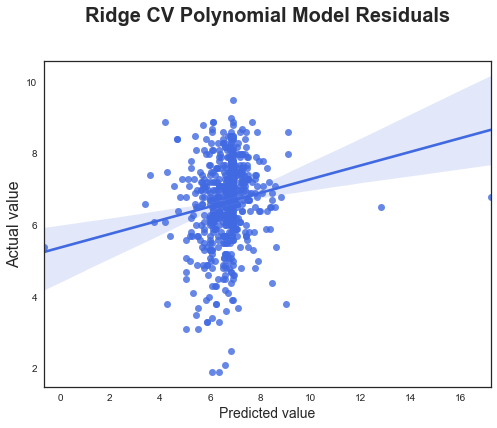

In [9]:
plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=ridge_test_pred_poly, y=y_test, color="royalblue")
ax.set_title("Ridge CV Polynomial Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-ridge-poly', dpi=300, bbox_inches='tight')

----

## Residuals w/ Q-Q plot (polynomial reg)

----

### Lasso 5-fold CV (poly)

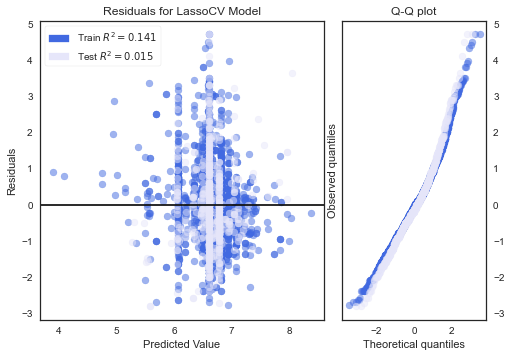

Note: Train/Test R^2 is for the residuals


In [34]:
visualizer = ResidualsPlot(lasso, hist=False, qqplot=True,
                          train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test)  # Score on our test data
visualizer.show()                         # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")

### Ridge 5-fold CV (poly)

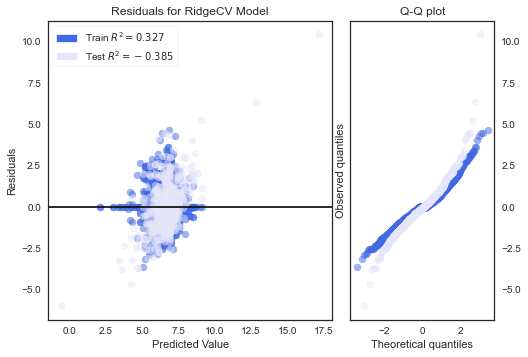

Note: Train/Test R^2 is for the residuals


In [35]:
visualizer = ResidualsPlot(ridge, hist=False, qqplot=True,
                          train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test)  # Score on our test data
visualizer.show()                         # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")

----

## Residuals w/ histograms (poly)

---

### Lasso 5-fold CV (poly)

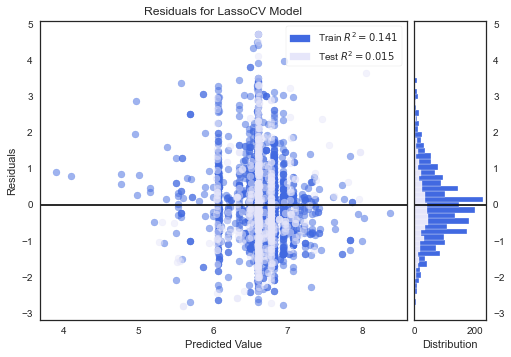

Note: Train/Test R^2 is for the residuals


In [36]:
visualizer = ResidualsPlot(lasso, train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test)  # Score on our test data
visualizer.show()                             # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")

### Ridge 5-fold CV (poly)

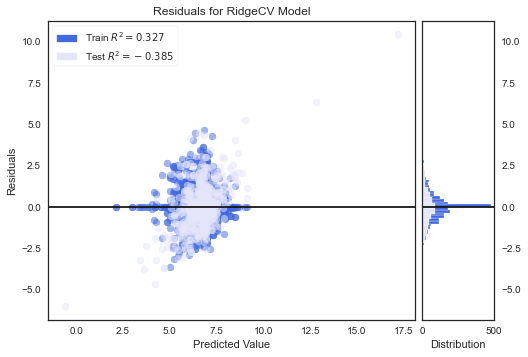

Note: Train/Test R^2 is for the residuals


In [37]:
visualizer = ResidualsPlot(ridge, train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test)  # Score on our test data
visualizer.show()                             # Finalize and render the figure
print("Note: Train/Test R^2 is for the residuals")